# Multi-Class Classification with Perceptron

Lab Assignment from [AI for Beginners Curriculum](https://github.com/microsoft/ai-for-beginners).

In [4]:
import matplotlib.cm as cm
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pickle
import gzip
import requests
import os
import pylab
import random

You can use the following perceptron training code from the lecture:

In [5]:
def train(positive_examples, negative_examples, num_iterations = 100):
    num_dims = positive_examples.shape[1]
    weights = np.zeros((num_dims,1)) # initialize weights
    
    pos_count = positive_examples.shape[0]
    neg_count = negative_examples.shape[0]
    
    report_frequency = 10
    
    for i in range(num_iterations):
        pos = random.choice(positive_examples)
        neg = random.choice(negative_examples)

        z = np.dot(pos, weights)   
        if z < 0:
            weights = weights + pos.reshape(weights.shape)

        z  = np.dot(neg, weights)
        if z >= 0:
            weights = weights - neg.reshape(weights.shape)
            
        if i % report_frequency == 0:             
            pos_out = np.dot(positive_examples, weights)
            neg_out = np.dot(negative_examples, weights)        
            pos_correct = (pos_out >= 0).sum() / float(pos_count)
            neg_correct = (neg_out < 0).sum() / float(neg_count)
            print("Iteration={}, pos correct={}, neg correct={}".format(i,pos_correct,neg_correct))

    return weights

In [6]:
def accuracy(weights, test_x, test_labels):
    res = np.dot(np.c_[test_x,np.ones(len(test_x))],weights)
    return (res.reshape(test_labels.shape)*test_labels>=0).sum()/float(len(test_labels))

# accuracy(wts, test_x, test_labels)

### Reading the Dataset

This code download the dataset from the repository on the internet. You can also manually copy the dataset from `/data` directory of AI Curriculum repo.

In [7]:
# ! del *.pkl
# ! https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz gzip -d mnist.pkl.gz

In [8]:
with gzip.open('../mnist.pkl.gz', 'rb') as file_contents:
    #train_set, valid_set, test_set = pickle.load(file_contents, encoding='latin1');
    MNIST = pickle.load(file_contents, encoding='latin1');

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01171875 0.0703125
 0.0703125  0.0703125  0.4921875  0.53125    0.68359375 0.1015625
 0.6484375  0.99609375 0.96484375 0.49609375 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.1171875  0.140625
 0.3671875  0.6015625 ]
5


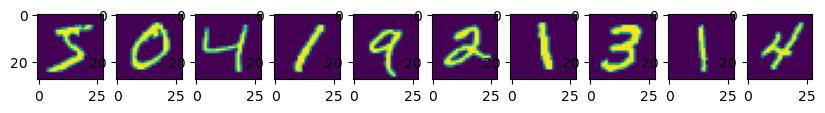

In [9]:
#print(MNIST['Train']['Features'][0][130:180])
#print(MNIST['Train']['Labels'][0])
#features = MNIST['Train']['Features'].astype(np.float32) / 256.0
#labels = MNIST['Train']['Labels']
#fig = plt.figure(figsize=(10,5))
#for i in range(10):
#    ax = fig.add_subplot(1,10,i+1)
#    plt.imshow(features[i].reshape(28,28))
#plt.show()

print(MNIST[0][0][0][130:180])
print(MNIST[0][1][0])
features = MNIST[0][0].astype(np.float32) / 256.0
labels = MNIST[0][1]
fig = pylab.figure(figsize=(10,5))
for i in range(10):
    ax = fig.add_subplot(1,10,i+1)
    pylab.imshow(features[i].reshape(28,28))
pylab.show()

Code to create *one-vs-other* dataset for two-digit classification. You need to modify this code to create *one-vs-all* dateset.

In [10]:
def set_mnist_pos_neg(positive_label, negative_label):
    positive_indices = [i for i, j in enumerate(MNIST[0][1]) 
                          if j == positive_label]
    negative_indices = [i for i, j in enumerate(MNIST[0][1]) 
                          if j == negative_label]

    positive_images = MNIST[0][0][positive_indices]
    negative_images = MNIST[0][0][negative_indices]

    return positive_images, negative_images

Now you need to:
1. Create 10 *one-vs-all* datasets for all digits
1. Train 10 perceptrons
1. Define `classify` function to perform digit classification
1. Measure the accuracy of classification and print *confusion matrix*
1. [Optional] Create improved `classify` function that performs the classification using one matrix multiplication.

In [11]:
# Draw digit from inputted dataset
def draw_digit(digit):
    fig = pylab.figure()
    ax = fig.add_subplot(1, 2, 1)
    pylab.imshow(digit[0].reshape(28,28), cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])

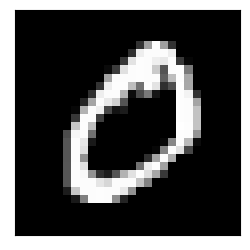

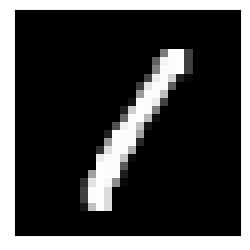

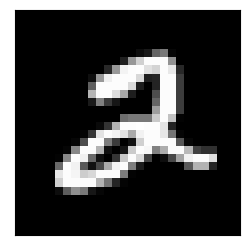

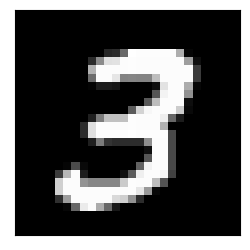

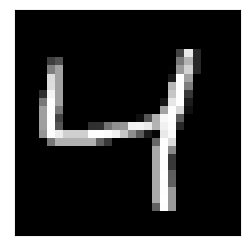

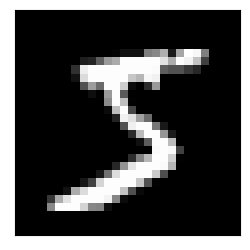

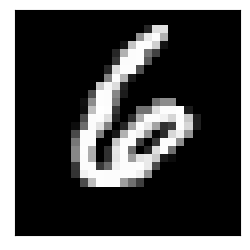

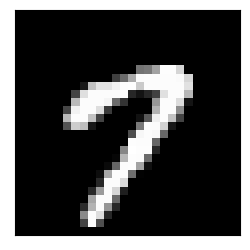

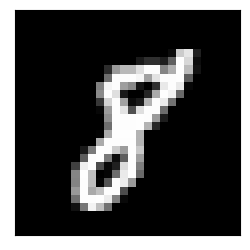

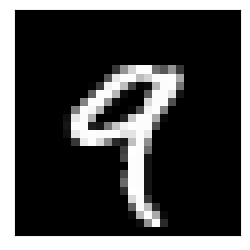

In [12]:
# 1. Create 10 one-vs-all datasets for all digits

# Get one-vs-all dataset for the inputted digit
def cmp_all_digits(digit):
    positive_indices = [i for i, j in enumerate(MNIST[0][1])
                          if j == digit]
    negative_indices = [i for i, j in enumerate(MNIST[0][1]) 
                          if j != digit]
    
    positive_images = MNIST[0][0][positive_indices]
    negative_images = MNIST[0][0][negative_indices]
    
    return positive_images, negative_images

# Create 10 datasets (1 for each digit 0 to 9)
datasets = []
for x in range(0,10):
    pos, neg = cmp_all_digits(x)
    datasets.append([pos, neg])
    
# Print images to check for accuracy
for x in range(0,10):
    draw_digit(datasets[x][0])

In [13]:
# 2. Train 10 perceptrons

perceptrons = []
for x in range(0,10):
    print("\n\nPerceptron ", x, ":\n")
    postive_examples = datasets[x][0]
    negative_examples = datasets[x][1]
    perceptron = train(postive_examples, negative_examples, 1000)
    perceptrons.append(perceptron)



Perceptron  0 :

Iteration=0, pos correct=0.0, neg correct=1.0
Iteration=10, pos correct=0.8532035685320357, neg correct=0.9773231561196414
Iteration=20, pos correct=0.8398215733982157, neg correct=0.9805183278601225
Iteration=30, pos correct=0.9835766423357665, neg correct=0.7998579923670898
Iteration=40, pos correct=0.9095701540957015, neg correct=0.947412798437916
Iteration=50, pos correct=0.9095701540957015, neg correct=0.947412798437916
Iteration=60, pos correct=0.9144363341443633, neg correct=0.9399352090174847
Iteration=70, pos correct=0.9257907542579076, neg correct=0.9281530132244609
Iteration=80, pos correct=0.9789132197891321, neg correct=0.8979542025383864
Iteration=90, pos correct=0.971816707218167, neg correct=0.8859057424336558
Iteration=100, pos correct=0.8742903487429035, neg correct=0.979786101002929
Iteration=110, pos correct=0.9677615571776156, neg correct=0.9054096032661756
Iteration=120, pos correct=0.9089618815896188, neg correct=0.9707996804828259
Iteration=13

Iteration=70, pos correct=0.9800986262768581, neg correct=0.9496186995171698
Iteration=80, pos correct=0.9811553363860515, neg correct=0.9529353368530301
Iteration=90, pos correct=0.9811553363860515, neg correct=0.9529353368530301
Iteration=100, pos correct=0.9811553363860515, neg correct=0.9529353368530301
Iteration=110, pos correct=0.9811553363860515, neg correct=0.9529353368530301
Iteration=120, pos correct=0.9971821063754843, neg correct=0.7877803348224358
Iteration=130, pos correct=0.9867911236350828, neg correct=0.9404810252244935
Iteration=140, pos correct=0.7592462134554421, neg correct=0.9872072559902532
Iteration=150, pos correct=0.6958436069038394, neg correct=0.9906141419611029
Iteration=160, pos correct=0.9825642831983092, neg correct=0.9398492847795678
Iteration=170, pos correct=0.9825642831983092, neg correct=0.9398492847795678
Iteration=180, pos correct=0.9825642831983092, neg correct=0.9398492847795678
Iteration=190, pos correct=0.9825642831983092, neg correct=0.939849

Iteration=130, pos correct=0.9172705314009661, neg correct=0.851039260969977
Iteration=140, pos correct=0.9176731078904992, neg correct=0.8656510925564044
Iteration=150, pos correct=0.9347826086956522, neg correct=0.8124888967845088
Iteration=160, pos correct=0.8786231884057971, neg correct=0.8413350506306626
Iteration=170, pos correct=0.9639694041867954, neg correct=0.6947059868537928
Iteration=180, pos correct=0.9549114331723028, neg correct=0.7303028957186001
Iteration=190, pos correct=0.7856280193236715, neg correct=0.9558314087759815
Iteration=200, pos correct=0.9357890499194848, neg correct=0.838448214602949
Iteration=210, pos correct=0.8329307568438004, neg correct=0.9507905489429739
Iteration=220, pos correct=0.8927133655394525, neg correct=0.9061556226683247
Iteration=230, pos correct=0.9047906602254429, neg correct=0.8862808669390656
Iteration=240, pos correct=0.6165458937198067, neg correct=0.9820349973352283
Iteration=250, pos correct=0.9233091787439613, neg correct=0.80147

Iteration=190, pos correct=0.8104293275828269, neg correct=0.7905075836878327
Iteration=200, pos correct=0.28935502842579885, neg correct=0.9642085569834518
Iteration=210, pos correct=0.6485002940599882, neg correct=0.9314906790797123
Iteration=220, pos correct=0.20348951186041953, neg correct=0.9957014632842602
Iteration=230, pos correct=0.5577337776906489, neg correct=0.9860575959375487
Iteration=240, pos correct=0.8219956871201726, neg correct=0.9221586226864741
Iteration=250, pos correct=0.7900411683983533, neg correct=0.9526047350720506
Iteration=260, pos correct=0.8833562046657518, neg correct=0.9073253301855275
Iteration=270, pos correct=0.887865124485395, neg correct=0.9085280295774961
Iteration=280, pos correct=0.7167222113311116, neg correct=0.9828058531370409
Iteration=290, pos correct=0.8425798862968046, neg correct=0.9432504064678501
Iteration=300, pos correct=0.9500098019996079, neg correct=0.770128510657253
Iteration=310, pos correct=0.8057243677710253, neg correct=0.960

Iteration=250, pos correct=0.6470467174315703, neg correct=0.986996300480716
Iteration=260, pos correct=0.9279687178431776, neg correct=0.9353802529850912
Iteration=270, pos correct=0.9197365713109693, neg correct=0.9535234044438538
Iteration=280, pos correct=0.8859847705289154, neg correct=0.9649985600673445
Iteration=290, pos correct=0.87075529944433, neg correct=0.9609224430118961
Iteration=300, pos correct=0.9660423955546409, neg correct=0.8770519040340267
Iteration=310, pos correct=0.9660423955546409, neg correct=0.8770519040340267
Iteration=320, pos correct=0.9409343486314057, neg correct=0.9276710750758733
Iteration=330, pos correct=0.9409343486314057, neg correct=0.9276710750758733
Iteration=340, pos correct=0.9409343486314057, neg correct=0.9276710750758733
Iteration=350, pos correct=0.9409343486314057, neg correct=0.9276710750758733
Iteration=360, pos correct=0.9878575838649928, neg correct=0.8031722824040229
Iteration=370, pos correct=0.8565548466762708, neg correct=0.966881

Iteration=310, pos correct=0.5641367066134043, neg correct=0.9757550446212687
Iteration=320, pos correct=0.8475366178428761, neg correct=0.8720270804941311
Iteration=330, pos correct=0.8697292498890369, neg correct=0.847276563942498
Iteration=340, pos correct=0.867953839325344, neg correct=0.8300874840638326
Iteration=350, pos correct=0.8291167332445628, neg correct=0.89690948256913
Iteration=360, pos correct=0.9243231247225921, neg correct=0.7872027080494131
Iteration=370, pos correct=0.8683976919662671, neg correct=0.8720050995735701
Iteration=380, pos correct=0.8053706169551709, neg correct=0.9017452850925397
Iteration=390, pos correct=0.7964935641367066, neg correct=0.874906581087616
Iteration=400, pos correct=0.690190856635597, neg correct=0.9307381193124368
Iteration=410, pos correct=0.9320905459387483, neg correct=0.6944432232821911
Iteration=420, pos correct=0.3575233022636485, neg correct=0.9874049325185739
Iteration=430, pos correct=0.8870395028850422, neg correct=0.813469908

Iteration=370, pos correct=0.9537467178347808, neg correct=0.9539390441519234
Iteration=380, pos correct=0.9537467178347808, neg correct=0.9539390441519234
Iteration=390, pos correct=0.9537467178347808, neg correct=0.9539390441519234
Iteration=400, pos correct=0.9907089476873359, neg correct=0.8691868853914626
Iteration=410, pos correct=0.9737426782468188, neg correct=0.9288108504073342
Iteration=420, pos correct=0.9737426782468188, neg correct=0.9288108504073342
Iteration=430, pos correct=0.9737426782468188, neg correct=0.9288108504073342
Iteration=440, pos correct=0.9737426782468188, neg correct=0.9288108504073342
Iteration=450, pos correct=0.9135528176126035, neg correct=0.9568247907833692
Iteration=460, pos correct=0.9549585942233892, neg correct=0.9479455703789207
Iteration=470, pos correct=0.905069682892345, neg correct=0.972541010899243
Iteration=480, pos correct=0.905069682892345, neg correct=0.972541010899243
Iteration=490, pos correct=0.9484952534841447, neg correct=0.9540944

Iteration=430, pos correct=0.9627053140096619, neg correct=0.9233463469046291
Iteration=440, pos correct=0.8865700483091787, neg correct=0.9785164528722811
Iteration=450, pos correct=0.9487922705314009, neg correct=0.9424428332403793
Iteration=460, pos correct=0.9487922705314009, neg correct=0.9424428332403793
Iteration=470, pos correct=0.9457004830917874, neg correct=0.9553374233128834
Iteration=480, pos correct=0.8927536231884058, neg correct=0.9812381483547128
Iteration=490, pos correct=0.8927536231884058, neg correct=0.9812381483547128
Iteration=500, pos correct=0.8927536231884058, neg correct=0.9812381483547128
Iteration=510, pos correct=0.9752657004830918, neg correct=0.9027105409927496
Iteration=520, pos correct=0.9752657004830918, neg correct=0.9027105409927496
Iteration=530, pos correct=0.971207729468599, neg correct=0.9106302286670385
Iteration=540, pos correct=0.9429951690821256, neg correct=0.9573898494143893
Iteration=550, pos correct=0.9429951690821256, neg correct=0.9573

Iteration=490, pos correct=0.691036761668732, neg correct=0.9193276938748395
Iteration=500, pos correct=0.8211482858323007, neg correct=0.8758359537623456
Iteration=510, pos correct=0.9384551838083437, neg correct=0.7063200318880376
Iteration=520, pos correct=0.8230070218917802, neg correct=0.8701669693077638
Iteration=530, pos correct=0.8539859562164395, neg correct=0.8359316178750166
Iteration=540, pos correct=0.9506402313093762, neg correct=0.6596616324903671
Iteration=550, pos correct=0.9268897149938042, neg correct=0.7294831480579299
Iteration=560, pos correct=0.919454770755886, neg correct=0.7443199433101555
Iteration=570, pos correct=0.6893845518380834, neg correct=0.9273218477346207
Iteration=580, pos correct=0.7255266418835192, neg correct=0.9264360689135923
Iteration=590, pos correct=0.9411400247831475, neg correct=0.7274680012400904
Iteration=600, pos correct=0.9337050805452293, neg correct=0.7708490189999557
Iteration=610, pos correct=0.9114002478314746, neg correct=0.80213

Iteration=550, pos correct=0.8548516439454691, neg correct=0.925486536923487
Iteration=560, pos correct=0.970729751403368, neg correct=0.7458011197014129
Iteration=570, pos correct=0.5314755412991179, neg correct=0.9751177463787435
Iteration=580, pos correct=0.8185645549318364, neg correct=0.9216875499866702
Iteration=590, pos correct=0.9679230152365678, neg correct=0.7731938149826713
Iteration=600, pos correct=0.9404570970328789, neg correct=0.8582155869545899
Iteration=610, pos correct=0.9482758620689655, neg correct=0.829445481205012
Iteration=620, pos correct=0.9025661587810746, neg correct=0.875011108148938
Iteration=630, pos correct=0.7209302325581395, neg correct=0.9548786990135963
Iteration=640, pos correct=0.9344426623897354, neg correct=0.8371323202701502
Iteration=650, pos correct=0.8279871692060946, neg correct=0.9286634675197725
Iteration=660, pos correct=0.958299919807538, neg correct=0.7799697858348885
Iteration=670, pos correct=0.9867682437850842, neg correct=0.63678574

In [14]:
# 3. Define classify function to perform digit classification

# Get test data from MNIST dataset
test_features = MNIST[1][0]
test_labels = MNIST[1][1]

# Return classification result of test input
def classify(features):
    
    # Get result from each trained perceptron
    results = []
    for x in range(0,10):
        r = np.dot(features, perceptrons[x])
        results.append(r)
    
    # Save index of most positive result as digit
    digit = np.argmax(results)

    return digit
        
# Run classification function with MNIST test data
num = 23
classified_digit = classify(test_features[num])
print(classified_digit)
print(test_labels[num])

1
1


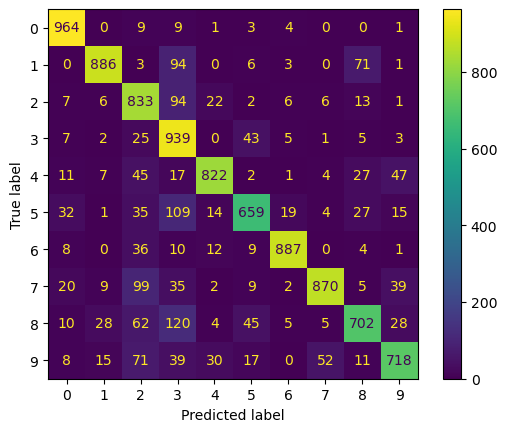


Accuracy = 82.8 %


In [19]:
# 4. Measure the accuracy of classification and print confusion matrix

# Classify all MNIST test data
calculated_digits = []
for feature in test_features:
    classification = classify(feature)
    calculated_digits.append(classification)
    
# Create confusion matrix
confusion_matrix = np.zeros([10,10], dtype=int)
t_max = len(test_labels)
for t in range(0,t_max):
    row = test_labels[t]
    col = calculated_digits[t]
    confusion_matrix[row][col] = confusion_matrix[row][col] + 1

# Plot confusion matrix
classes = [0,1,2,3,4,5,6,7,8,9]
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=classes)
disp.plot()
plt.show()

# Get overall accuracy of the perceptron
a = confusion_matrix.diagonal()
accuracy = np.sum(a) / t_max
print("\nAccuracy =", accuracy*100, "%")